Q1 - Employee

In [2]:
# Question 1

# Imports libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Imports datasets
employee_df = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Employee.csv")
stops_df  = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_List_of_L_Stops.csv")
entries_df  = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_entries.csv")

# Finds female employment percentage for each education level
educ_female_percent = employee_df.groupby('Education')['Gender'].value_counts(normalize=True).unstack()['Female']*100
print(educ_female_percent)



Education
Bachelors    39.850042
Masters      42.497136
PHD          38.547486
Name: Female, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

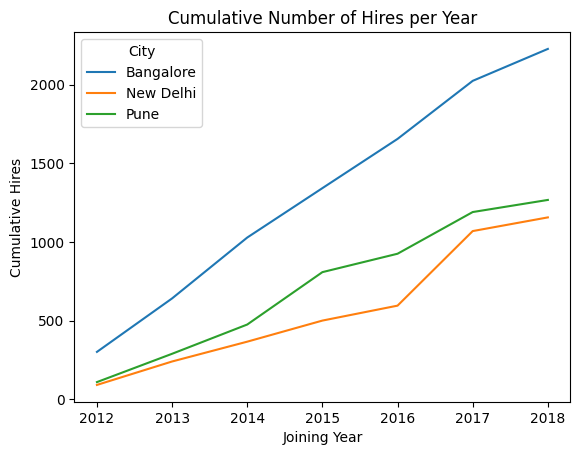

In [9]:
from traitlets.config.application import T
from matplotlib import legend

# Part b)

# Creates line plots for cumulative number of hires by year for each city
cumulative_hires = employee_df.groupby(['City','JoiningYear']).size().groupby(level=0).cumsum()
cumulative_hires = cumulative_hires.unstack().T
cumulative_hires.plot(kind='line', title="Cumulative Number of Hires per Year")
plt.xlabel("Joining Year")
plt.ylabel("Cumulative Hires")
plt.legend(title="City")
plt.show


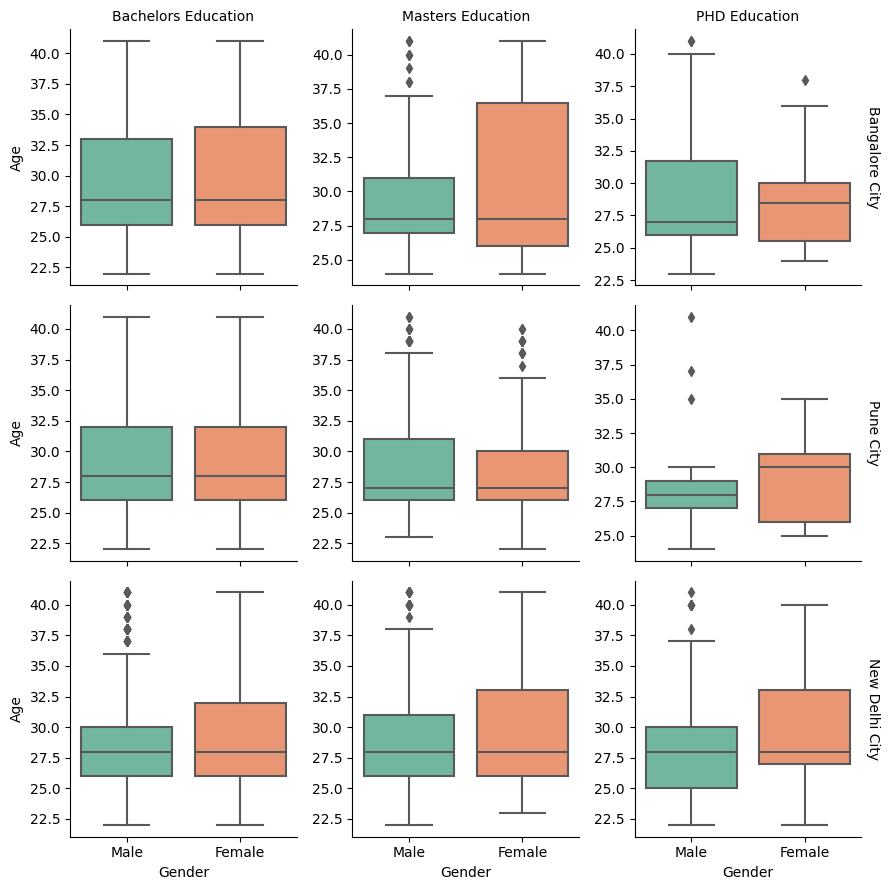

In [31]:
# Part c)

# Creates boxplots of age versus gender faceted by city on the rows and education on the columns

# Creates a FacetGrid for boxplots
g = sns.FacetGrid(employee_df, row='City', col='Education', margin_titles=True, sharey=False)

# Creates a boxplot for age versus gender
g.map_dataframe(sns.boxplot, x='Gender', y='Age', palette='Set2')

# Sets axis labels, titles, and layout
g.set_axis_labels('Gender','Age')
g.set_titles(col_template='{col_name} Education', row_template='{row_name} City')
g.tight_layout()

# Shows the result
plt.show()

In [52]:

# Part d)

# Determines the ratio of Bachelor's degrees to Ph.D.'s hired by JoiningYear and City
ratio_df = employee_df[employee_df['Education'].isin(["Bachelors","PHD"])].groupby(['City','JoiningYear','Education']).size().unstack().fillna(0)
ratio_df['Ratio'] = ratio_df['Bachelors']/ratio_df['PHD']
max_ratio_year = ratio_df['Ratio'].idxmax()
max_ratio_value = ratio_df['Ratio'].max()
print(f"Year with the highest ratio is {max_ratio_year} with the ratio of {max_ratio_value}")

# Determines the ratio of bachelors per Ph.D for each city
city_ratio = ratio_df.groupby('City')['Ratio'].max()
max_city = city_ratio.idxmax()
max_city_ratio = city_ratio.max()
print(f"City with the highest Bachelors to Ph.D.'s ratio is {max_city} with the ratio of {max_city_ratio}")

# Determines the number of Masters hires in the year and city with the highest ratio
master_hires = employee_df[(employee_df['Education'] == "Masters") & (employee_df['City'] == max_city) & (employee_df['JoiningYear'] == max_ratio_year[1])]
print(f"Number of Master's hires in that year and city is {len(master_hires)}")

Year with the highest ratio is ('Pune', 2014) with the ratio of 166.0
City with the highest Bachelors to Ph.D.'s ratio is Pune with the ratio of 166.0
Number of Master's hires in that year and city is 19


Question 2 - CTA

In [6]:

# Part a)

# Impots data
stops_df  = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_List_of_L_Stops.csv")
entries_df  = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_entries.csv")


# Filters for Red Line stop and removes duplicates
red_line_stops = stops_df[stops_df["RED"] == True].drop_duplicates(subset="MAP_ID")

# Merges stop entries onto the entries data
merg = pd.merge(entries_df, red_line_stops, left_on="station_id", right_on="MAP_ID")


In [7]:

# Part b)

# Converts date column to datetime
merg['date'] = pd.to_datetime(merg['date'])

# Extracts month and year from date column
merg['month'] = merg['date'].dt.month
merg['year'] = merg['date'].dt.year

# Calculates the average rides per day for each station
avg_daily_rides = merg.groupby("STATION_NAME")['rides'].mean()

# Calculates the average rides per day for each station for each month
avg_daily_rides_month = merg.groupby(['STATION_NAME','year','month'])['rides'].mean().reset_index()



In [8]:

# Part c)

# Determines the ratio of average rides per day per average rides per month
avg_daily_rides_month['ratio'] = avg_daily_rides_month['rides'] / avg_daily_rides_month['STATION_NAME'].map(avg_daily_rides)

# Finds the top 10 largest ratios
top_10_ratio = avg_daily_rides_month.nlargest(10, 'ratio')
print(top_10_ratio)
print(("\nBased on the top 10 ratio, I believe that sharp increase in ridership for stations Addison and SoX-35th is due to baseball games being played by Cubs and White Sox on their stadiums which are close to these stations. Harrison and Grand are located in downtown, which makes sense to have more trafick. However, Thorndale remains a mistery."))

     STATION_NAME  year  month         rides     ratio
8498    Thorndale  2012      6   4313.633333  1.876224
1813      Addison  2017      8  12041.645161  1.786563
5029     Harrison  2015     10   5148.870968  1.769437
1716      Addison  2009      7  11880.419355  1.762643
8232     Sox-35th  2012      9   6159.466667  1.721390
1801      Addison  2016      8  11535.451613  1.711462
1790      Addison  2015      9  11444.800000  1.698012
5041     Harrison  2016     10   4935.064516  1.695961
5017     Harrison  2014     10   4933.193548  1.695318
4486        Grand  2015      7  14793.193548  1.693683

Based on the top 10 ratio, I believe that sharp increase in ridership for stations Addison and SoX-35th is due to baseball games being played by Cubs and White Sox on their stadiums which are close to these stations. Harrison and Grand are located in downtown, which makes sense to have more trafick. However, Thorndale remains a mistery.


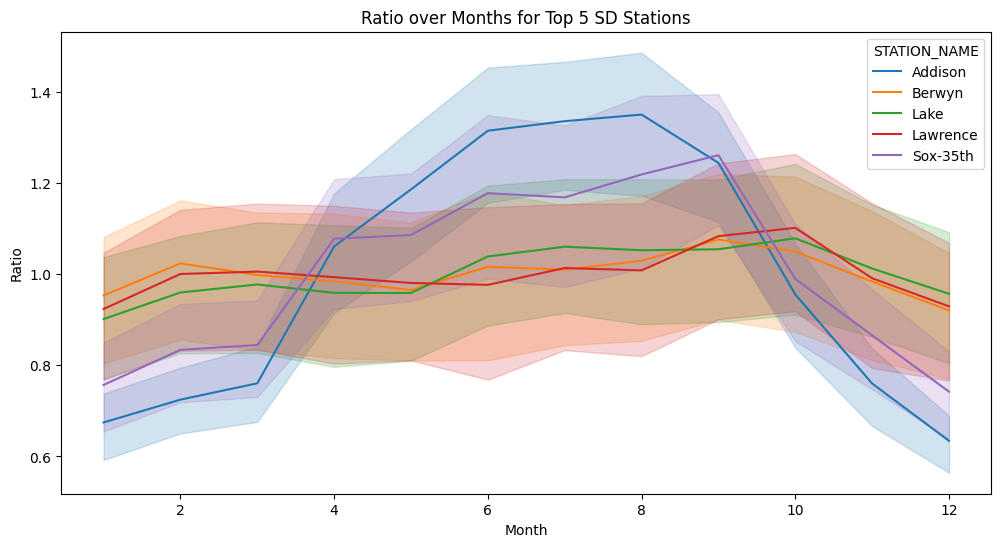

In [82]:

# Part d)

# Determines the standard deviation for each station
std_dev = avg_daily_rides_month.groupby('STATION_NAME')['ratio'].std().reset_index()

# Finds the stations with the top 5 largest standard deviations
top_5_sd = std_dev.nlargest(5, 'ratio')['STATION_NAME']

# Filters the data for the top 5 stations
top_5_stations = avg_daily_rides_month[avg_daily_rides_month['STATION_NAME'].isin(top_5_sd)]

# Plots a top_5_stations
plt.figure(figsize=(1,6))
sns.lineplot(data=top_5_stations,x='month', y='ratio', hue='STATION_NAME')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.title('Ratio over Months for Top 5 SD Stations')
plt.show()
